In [1]:
import numpy as np
import pandas as pd
#from sklearn.linear_model import LogisticRegression - using statsmodels because that produces a readable summary of coefs etc.
from statsmodels.api import Logit, add_constant
from sklearn import metrics
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

C:\Users\stuar\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\stuar\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\stuar\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=labels,
                yticklabels=labels,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    return matrix

In [3]:
#DATA_PATH = '/content/drive/MyDrive/capstone/data'
DATA_PATH = 'C:/Users/stuar/OneDrive/Documents/Capstone/data'

In [4]:
features_df = pd.read_csv(DATA_PATH + '/features_df_2.csv')
features_df['date'] = pd.to_datetime(features_df['GAME_DATE'])

In [5]:
features_df

,GAME_DATE,HOME_PLAYER_1_POSS,HOME_PLAYER_1_TS_PCT,HOME_PLAYER_1_FG_PCT,HOME_PLAYER_1_FG3_PCT,HOME_PLAYER_1_FT_PCT,HOME_PLAYER_1_MIN_SAVG,HOME_PLAYER_1_POSS_SAVG,HOME_PLAYER_1_OREB_PAVG,HOME_PLAYER_1_DREB_PAVG,...,ROAD_PLAYER_9_PTS_FB_PAVG,ROAD_PLAYER_9_PTS_PAINT_PAVG,ROAD_PLAYER_9_OPP_PTS_OFF_TOV_PAVG,ROAD_PLAYER_9_OPP_PTS_2ND_CHANCE_PAVG,ROAD_PLAYER_9_OPP_PTS_FB_PAVG,ROAD_PLAYER_9_OPP_PTS_PAINT_PAVG,ROAD_PLAYER_9_BLKA_PAVG,ROAD_PLAYER_9_PFD_PAVG,ROAD_PLAYER_9_PLAYER_NAME,date
0,2000-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Keyon Dooling,2000-10-31
1,2000-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mateen Cleaves,2000-10-31
2,2000-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Richard Hamilton,2000-10-31
3,2000-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Toni Kukoc,2000-10-31
4,2000-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hersey Hawkins,2000-10-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26734,2021-05-16,4426.0,59.039270,43.880326,34.263959,88.745387,34.004839,71.387097,0.008586,0.046091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-16
26735,2021-05-16,4885.0,52.084927,41.596639,32.485323,77.153558,32.056103,68.802817,0.012078,0.056704,...,0.016358,0.116685,0.125409,0.137950,0.121047,0.430752,0.006543,0.035442,Willie Cauley-Stein,2021-05-16
26736,2021-05-16,3798.0,48.851432,36.824877,33.548387,74.814815,27.568490,59.343750,0.006582,0.048973,...,0.008734,0.052402,0.179039,0.113537,0.096070,0.436681,0.021834,0.056769,Yogi Ferrell,2021-05-16
26737,2021-05-16,1890.0,52.211582,45.609756,28.282828,86.153846,15.011944,31.500000,0.005820,0.045503,...,0.015152,0.127273,0.127273,0.087879,0.133333,0.503030,0.003030,0.057576,Donta Hall,2021-05-16


In [6]:
features_df.shape

(26739, 671)

In [7]:
features_df.describe()

,HOME_PLAYER_1_POSS,HOME_PLAYER_1_TS_PCT,HOME_PLAYER_1_FG_PCT,HOME_PLAYER_1_FG3_PCT,HOME_PLAYER_1_FT_PCT,HOME_PLAYER_1_MIN_SAVG,HOME_PLAYER_1_POSS_SAVG,HOME_PLAYER_1_OREB_PAVG,HOME_PLAYER_1_DREB_PAVG,HOME_PLAYER_1_REB_PAVG,...,ROAD_PLAYER_9_PTS_OFF_TOV_PAVG,ROAD_PLAYER_9_PTS_2ND_CHANCE_PAVG,ROAD_PLAYER_9_PTS_FB_PAVG,ROAD_PLAYER_9_PTS_PAINT_PAVG,ROAD_PLAYER_9_OPP_PTS_OFF_TOV_PAVG,ROAD_PLAYER_9_OPP_PTS_2ND_CHANCE_PAVG,ROAD_PLAYER_9_OPP_PTS_FB_PAVG,ROAD_PLAYER_9_OPP_PTS_PAINT_PAVG,ROAD_PLAYER_9_BLKA_PAVG,ROAD_PLAYER_9_PFD_PAVG
count,26340.000000,26339.000000,26339.000000,26227.000000,26187.000000,26340.000000,26340.000000,26340.000000,26340.000000,26340.000000,...,25091.000000,25091.000000,25091.000000,25091.000000,25091.000000,2.509200e+04,25091.000000,25091.000000,25091.000000,25091.000000
mean,2212.035725,53.209124,43.122661,34.089505,80.405172,31.143968,62.120639,0.010608,0.044866,0.055446,...,0.027428,0.025517,0.019344,0.069409,0.175382,inf,0.128490,0.409017,0.009659,0.026591
std,1440.177678,5.745884,4.920583,9.409431,9.403146,6.234052,12.417178,0.006228,0.014674,0.017755,...,0.017562,0.020273,0.017098,0.043274,0.047043,NaN,0.043214,0.075116,0.008395,0.023611
min,3.000000,0.000000,0.000000,0.000000,0.000000,1.233333,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1008.000000,50.095508,40.446650,30.769231,75.925926,27.837879,55.478940,0.006610,0.035955,0.044286,...,0.016706,0.012346,0.006792,0.037736,0.154011,1.175060e-01,0.106509,0.371882,0.004623,0.000427
50%,2014.000000,53.292894,43.237251,35.135135,81.432749,32.445508,64.708976,0.009207,0.042624,0.052475,...,0.026125,0.021809,0.016524,0.064103,0.173752,1.354293e-01,0.127907,0.412144,0.008621,0.026012
75%,3259.000000,56.659718,45.906433,38.961039,86.333169,35.465140,70.833333,0.013193,0.050633,0.062918,...,0.036018,0.035265,0.027823,0.094862,0.195185,1.534091e-01,0.148148,0.449302,0.012987,0.040541
max,7149.000000,102.848101,87.500000,100.000000,100.000000,48.233333,98.000000,0.078261,0.177419,0.205128,...,0.285714,0.500000,0.272727,0.600000,1.166667,inf,1.000000,2.000000,0.333333,1.000000


In [8]:
features_df.columns[:100]

Index(['GAME_DATE', 'HOME_PLAYER_1_POSS', 'HOME_PLAYER_1_TS_PCT',
       'HOME_PLAYER_1_FG_PCT', 'HOME_PLAYER_1_FG3_PCT', 'HOME_PLAYER_1_FT_PCT',
       'HOME_PLAYER_1_MIN_SAVG', 'HOME_PLAYER_1_POSS_SAVG',
       'HOME_PLAYER_1_OREB_PAVG', 'HOME_PLAYER_1_DREB_PAVG',
       'HOME_PLAYER_1_REB_PAVG', 'HOME_PLAYER_1_AST_PAVG',
       'HOME_PLAYER_1_STL_PAVG', 'HOME_PLAYER_1_BLK_PAVG',
       'HOME_PLAYER_1_TOV_PAVG', 'HOME_PLAYER_1_PF_PAVG',
       'HOME_PLAYER_1_PTS_PAVG', 'HOME_PLAYER_1_FTA_PAVG',
       'HOME_PLAYER_1_AST_PCT_ADJ_PAVG', 'HOME_PLAYER_1_AST_RATIO_ADJ_PAVG',
       'HOME_PLAYER_1_OFF_RATING_ADJ_PAVG',
       'HOME_PLAYER_1_DEF_RATING_ADJ_PAVG', 'HOME_PLAYER_1_USG_PCT_ADJ_PAVG',
       'HOME_PLAYER_1_OREB_PCT_ADJ_PAVG', 'HOME_PLAYER_1_DREB_PCT_ADJ_PAVG',
       'HOME_PLAYER_1_REB_PCT_ADJ_PAVG', 'HOME_PLAYER_1_TM_TOV_PCT_ADJ_PAVG',
       'HOME_PLAYER_1_PTS_OFF_TOV_PAVG', 'HOME_PLAYER_1_PTS_2ND_CHANCE_PAVG',
       'HOME_PLAYER_1_PTS_FB_PAVG', 'HOME_PLAYER_1_PTS_PAINT_PAVG'

In [9]:
features_df['WIN']

0        1.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
26734    1.0
26735    1.0
26736    1.0
26737    1.0
26738    0.0
Name: WIN, Length: 26739, dtype: float64

In [10]:
min_poss = 200

features_df2 = features_df.drop(features_df.columns[features_df.columns.str.contains('GAME_')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('SEASON_ID')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_PLAYER_NAME')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_MIN_SAVG')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_POSS_SAVG')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_PERCENT_PLAY')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_PTS_PAVG')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_REB_PAVG')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_FG_PCT')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_FG3_PCT')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_FT_PCT')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_AST_RATIO_')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_USG_')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('REB_PCT_')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_TM_TOV_PCT_')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_PTS_OFF_TOV_')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_PTS_2ND_CHANCE_')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_PTS_FB_')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_PTS_PAINT_')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_BLKA_')], axis=1)

features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('HOME_PLAYER_9_')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('ROAD_PLAYER_9_')], axis=1)

print(features_df2.shape)
features_df2 = features_df2[features_df2['HOME_PLAYER_1_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['HOME_PLAYER_2_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['HOME_PLAYER_3_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['HOME_PLAYER_4_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['HOME_PLAYER_5_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['HOME_PLAYER_6_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['HOME_PLAYER_7_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['HOME_PLAYER_8_POSS'] >= min_poss]
#features_df2 = features_df2[features_df2['HOME_PLAYER_9_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['ROAD_PLAYER_1_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['ROAD_PLAYER_2_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['ROAD_PLAYER_3_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['ROAD_PLAYER_4_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['ROAD_PLAYER_5_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['ROAD_PLAYER_6_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['ROAD_PLAYER_7_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['ROAD_PLAYER_8_POSS'] >= min_poss]
#features_df2 = features_df2[features_df2['ROAD_PLAYER_9_POSS'] >= min_poss]
print(features_df2.shape)

features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('NUM_GAMES')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_POSS')], axis=1)
features_df2 = features_df2.dropna()

print(features_df2.shape)


(26739, 227)
(21152, 227)
(21152, 210)


In [11]:
features_df2.columns[:100]

Index(['HOME_PLAYER_1_TS_PCT', 'HOME_PLAYER_1_OREB_PAVG',
       'HOME_PLAYER_1_DREB_PAVG', 'HOME_PLAYER_1_AST_PAVG',
       'HOME_PLAYER_1_STL_PAVG', 'HOME_PLAYER_1_BLK_PAVG',
       'HOME_PLAYER_1_TOV_PAVG', 'HOME_PLAYER_1_PF_PAVG',
       'HOME_PLAYER_1_FTA_PAVG', 'HOME_PLAYER_1_AST_PCT_ADJ_PAVG',
       'HOME_PLAYER_1_OFF_RATING_ADJ_PAVG',
       'HOME_PLAYER_1_DEF_RATING_ADJ_PAVG', 'HOME_PLAYER_1_PFD_PAVG', 'WIN',
       'ROAD_PLAYER_1_TS_PCT', 'ROAD_PLAYER_1_OREB_PAVG',
       'ROAD_PLAYER_1_DREB_PAVG', 'ROAD_PLAYER_1_AST_PAVG',
       'ROAD_PLAYER_1_STL_PAVG', 'ROAD_PLAYER_1_BLK_PAVG',
       'ROAD_PLAYER_1_TOV_PAVG', 'ROAD_PLAYER_1_PF_PAVG',
       'ROAD_PLAYER_1_FTA_PAVG', 'ROAD_PLAYER_1_AST_PCT_ADJ_PAVG',
       'ROAD_PLAYER_1_OFF_RATING_ADJ_PAVG',
       'ROAD_PLAYER_1_DEF_RATING_ADJ_PAVG', 'ROAD_PLAYER_1_PFD_PAVG',
       'HOME_PLAYER_2_TS_PCT', 'HOME_PLAYER_2_OREB_PAVG',
       'HOME_PLAYER_2_DREB_PAVG', 'HOME_PLAYER_2_AST_PAVG',
       'HOME_PLAYER_2_STL_PAVG', 'HOME_PLAY

In [12]:
cutoff_date = pd.to_datetime('2014-04-16')
cutoff_date

train = features_df2[features_df2['date'] <= cutoff_date]
test = features_df2[features_df2['date'] > cutoff_date]

x_train = train.drop(['date','WIN'], axis=1)
y_train = train['WIN']
x_test = test.drop(['date','WIN'], axis=1)
y_test = test['WIN']

In [13]:
x_train.shape

(14229, 208)

In [14]:
x_test.shape

(6923, 208)

In [15]:
log_reg = Logit(y_train, add_constant(x_train)).fit()

C:\Users\stuar\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.583837
         Iterations 6


In [16]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    WIN   No. Observations:                14229
Model:                          Logit   Df Residuals:                    14020
Method:                           MLE   Df Model:                          208
Date:                Sun, 17 Apr 2022   Pseudo R-squ.:                  0.1313
Time:                        15:01:34   Log-Likelihood:                -8307.4
converged:                       True   LL-Null:                       -9562.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.6581      1.683      0.391      0.696      -2.640       3.956
HOME_PLAYER_1_TS_PCT                  0.0104      0.006      1.795      0.073      -0.001       0.022
HOME_PLAYER_1_OREB_PAVG              14.4585      4.451      3.248      0.001       5.735      23.183
HOME_PLAYER_1_DREB_PAVG               0.3361      2.137      0.157      0.875      -3.853       4.525
HOME_PLAYER_1_AST_PAVG               -8.6683      4.500     -1.926      0.054     -17.488       0.152
HOME_PLAYER_1_STL_PAVG                0.2304      3.483      0.066      0.947      -6.596       7.057
HOME_PLAYER_1_BLK_PAVG                1.9489      7.957      0.245      0.807     -13.646      17.544
HOME_PLAYER_1_TOV_PAVG                3.8425      2.944      1.305      0.192      -1.928       9.613
HOME_PLAYER_1_PF_PAVG                -5.6275      2.236     -2.517      0.012     -10.010      -1.245
HOME_PLAYER_1_FTA_PAVG               -5.8808      1.577     -3.728      0.000      -8.972      -2.789
HOME_PLAYER_1_AST_PCT_ADJ_PAVG        3.3923      1.466      2.314      0.021       0.520       6.265
HOME_PLAYER_1_OFF_RATING_ADJ_PAVG     0.0359      0.009      4.035      0.000       0.018       0.053
HOME_PLAYER_1_DEF_RATING_ADJ_PAVG    -0.0312      0.008     -3.685      0.000      -0.048      -0.015
HOME_PLAYER_1_PFD_PAVG                7.7668      2.106      3.687      0.000       3.638      11.895
ROAD_PLAYER_1_TS_PCT                 -0.0127      0.006     -2.170      0.030      -0.024      -0.001
ROAD_PLAYER_1_OREB_PAVG             -13.8206      4.428     -3.121      0.002     -22.499      -5.143
ROAD_PLAYER_1_DREB_PAVG              -0.2503      2.121     -0.118      0.906      -4.408       3.907
ROAD_PLAYER_1_AST_PAVG                4.8252      4.500      1.072      0.284      -3.994      13.644
ROAD_PLAYER_1_STL_PAVG                1.2728      3.472      0.367      0.714      -5.533       8.078
ROAD_PLAYER_1_BLK_PAVG                4.7108      7.808      0.603      0.546     -10.593      20.014
ROAD_PLAYER_1_TOV_PAVG                3.4926      3.007      1.161      0.245      -2.401       9.386
ROAD_PLAYER_1_PF_PAVG                 5.5010      2.249      2.446      0.014       1.094       9.908
ROAD_PLAYER_1_FTA_PAVG                1.3239      1.575      0.840      0.401      -1.764       4.412
ROAD_PLAYER_1_AST_PCT_ADJ_PAVG       -2.4256      1.476     -1.643      0.100      -5.319       0.468
ROAD_PLAYER_1_OFF_RATING_ADJ_PAVG    -0.0231      0.009     -2.595      0.009      -0.041      -0.006
ROAD_PLAYER_1_DEF_RATING_ADJ_PAVG     0.0302      0.009      3.449      0.001       0.013       0.047
ROAD_PLAYER_1_PFD_PAVG               -3.4059      2.096     -1.625      0.104      -7.513       0.701
HOME_PLAYER_2_TS_PCT                  0.0139      0.005      2.684      0.007       0.004       0.024
HOME_PLAYER_2_OREB_PAVG              -3.9554      3.414     -1.158      0.247  

In [17]:
yhat = log_reg.predict(add_constant(x_test))

In [18]:
yhat >= 0.5

18119     True
18133    False
18137     True
18138    False
18140     True
         ...  
26731     True
26733     True
26735    False
26736    False
26737     True
Length: 6923, dtype: bool

In [19]:
y_test

18119    1.0
18133    1.0
18137    1.0
18138    0.0
18140    1.0
        ... 
26731    1.0
26733    0.0
26735    1.0
26736    1.0
26737    1.0
Name: WIN, Length: 6923, dtype: float64

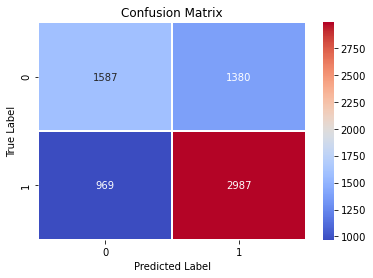

array([[1587, 1380],
       [ 969, 2987]], dtype=int64)

In [20]:
labels = ["0", "1"]
show_confusion_matrix(y_test, yhat >= 0.5)

In [21]:
print(metrics.classification_report(y_test, yhat >= 0.5))

              precision    recall  f1-score   support

         0.0       0.62      0.53      0.57      2967
         1.0       0.68      0.76      0.72      3956

    accuracy                           0.66      6923
   macro avg       0.65      0.64      0.65      6923
weighted avg       0.66      0.66      0.66      6923



In [22]:
metrics.roc_auc_score(y_test, yhat)

0.7017832319995856

In [23]:
# this is the statistics for just predicting the home team always wins
print(metrics.classification_report(y_test, yhat >= 0))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      2967
         1.0       0.57      1.00      0.73      3956

    accuracy                           0.57      6923
   macro avg       0.29      0.50      0.36      6923
weighted avg       0.33      0.57      0.42      6923



C:\Users\stuar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\stuar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\stuar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
